<a href="https://colab.research.google.com/github/KavourEI/PyTorch_Exploration/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch computer vision

## 0. Computer vision libraries in PyTorch

* `torchvision` -  vase domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasets and data loading function for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.tranforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class dor PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.



In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualizations
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

The dataset we'll be using is fashion MNIST from `torchvision.datasets`

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root='data',  # where to download data to?
    train=True, # do we want the training dataset?
    download = True,  # do we want to download it?
    transform = torchvision.transforms.ToTensor(),  # how do we want to transform the data
    target_transform = None # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11216120.75it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 194582.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3738400.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23546648.85it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Seee the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape : {image.shape}-> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape : torch.Size([1, 28, 28])-> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape : torch.Size([1, 28, 28])


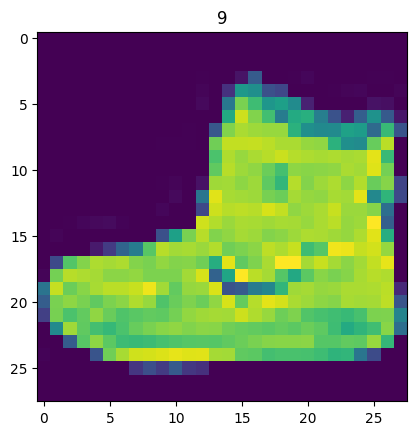

In [9]:
import matplotlib.pyplot as plt

image, labe = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

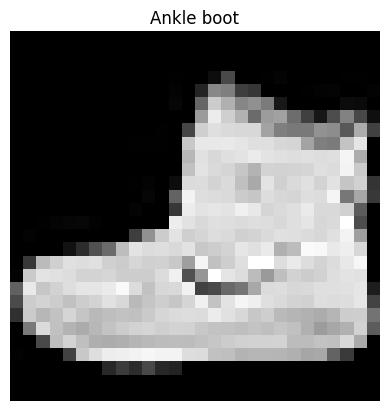

In [10]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);

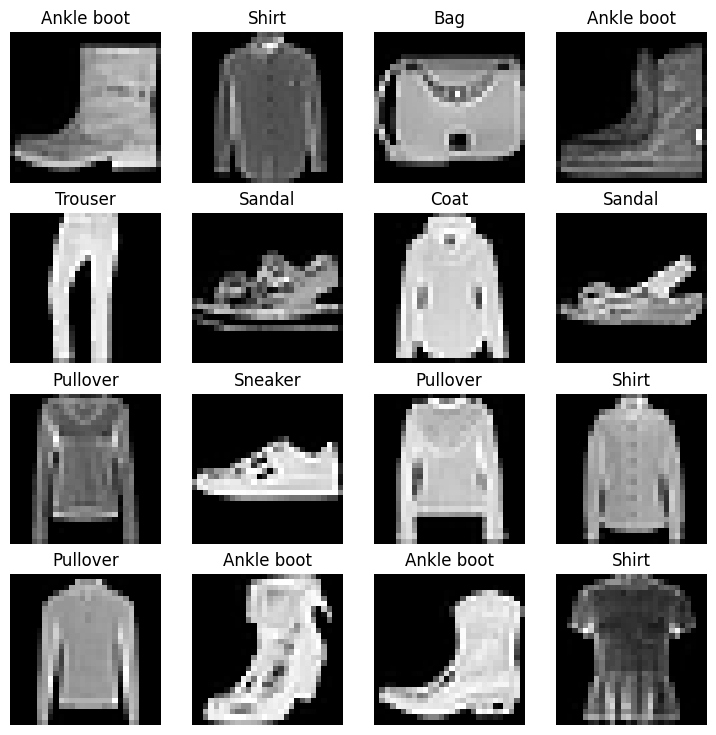

In [11]:
# Plot mode images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size =[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare Dataloader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch.

In [12]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle =True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a7790d5f2b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a778eb8b670>)

In [13]:
# Let's check out wheat we've created

print(f"DataLoader {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader {len(test_dataloader)} batch of {BATCH_SIZE}...")

DataLoader (<torch.utils.data.dataloader.DataLoader object at 0x7a7790d5f2b0>, <torch.utils.data.dataloader.DataLoader object at 0x7a778eb8b670>)
Length of train_dataloader 1875 batches of 32...
Length of test_dataloader 313 batch of 32...


In [14]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 6, label size : torch.Size([])


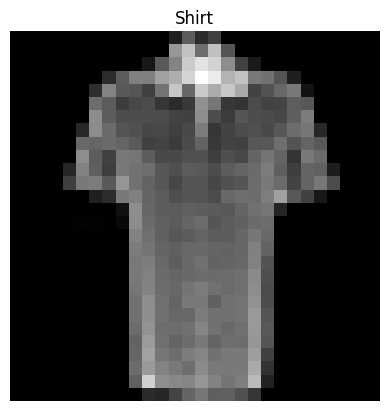

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a single model uyou will try and improve upon with subsequent models/experiments.

In other words : start simply and add complexity when necessary.

In [16]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flattern the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}") #-> color_channerls, height, width
print(f"Shape after flattening: {output.shape}") #-> color_channerls, height * width

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [17]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochastic Gradient Descent)
* Evaluation metric - sinc we're working on a classification problem, let's use accuracy as evaluation metric

In [20]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [21]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [22]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop throuygh epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through ttesting batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what is happening.
5. Time it all (for fun).


In [23]:
# Import tqdm for progress bar

from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the sed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop:
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  ## Training:
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    #3. Optimizer zero_grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    # Print out what is happening:
    if batch % 400 ==0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by lengtr of train dataloader
  train_loss /= len(train_dataloader)


  ## Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Forward Pass
      test_pred = model_0(X_test)

      #2. Calculate the loss (accumulatevily)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate the accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what is happening
  print(f"\nTrain loss : {train_loss:.4f} | Test loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.5904 | Test loss: 0.5095, Test Accuracy: 82.0387
Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4763 | Test loss: 0.4799, Test Accuracy: 83.1969
Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss : 0.4550 | Test loss: 0.4766, Test Accuracy: 83.4265
Train time on cpu: 29.699 seconds


## 4. Make predictions and get Model 0 results

In [24]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_los" : loss.item(),
          "model_acc" : acc}

# Calculate model 0 results on test dataset

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_los': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [25]:
# Setup device agnostic code:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [26]:
# Let's create a model with non linear and linear layers.

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten input into a single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [27]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup a loss, optimizer and evaluation metrics.

In [28]:
loss_fn  = nn.CrossEntropyLoss()  # Measure how wrong our model is

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1) # Tries to update our model's parameters to reduce loss

### 6.2 Functionizing training and evaluation/testing loops

Let's create a fuctnion for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)

    #2. Calculate the loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    #3. Optimizer zero_grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by lengtr of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss : {train_loss:.5f} Train Acc : {train_acc:.2f}%")

In [30]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0,0

  #Put the model in eval mode:
  model.eval()
  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in test_dataloader:
      # Send data to target device:
      X, y = X.to(device), y.to(device)

      #1. Forward Pass
      test_pred = model(X)

      #2. Calculate the loss/acc (accumulatevily)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))

    # Adjest metrics and priunt out
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what is happening
  print(f"Test loss : {test_loss:.5f} Test Accuracy: {test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n---------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device= device)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_on_model_1 = print_train_time(start = train_time_start_on_gpu,
                                           end = train_time_end_on_gpu,
                                           device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------
Train Loss : 1.09199 Train Acc : 61.34%
Test loss : 0.95636 Test Accuracy: 65.00%

Epoch 1
---------
Train Loss : 0.78101 Train Acc : 71.93%
Test loss : 0.72227 Test Accuracy: 73.91%

Epoch 2
---------
Train Loss : 0.67027 Train Acc : 75.94%
Test loss : 0.68500 Test Accuracy: 75.02%

Train time on cuda: 37.072 seconds


In [32]:
# Train time on CPU
total_train_time_model_0

29.698667806000003

**Note:** Sometimes, depending on data/hardware, it might be the case that a model runs faster on a cpu than a gpu

Whe is this?

1. It could be that the overhead for copying data/model to and from the gpu outwights the comput benefits offered by the GPU.
2. The hardware that is used has a better CPU in terms of compute capability than the GPU (it's rare but it happens)

In [33]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilitis to find patterns in visual data.

To find out more about CNNs go to : https://poloclub.github.io/cnn-explainer/

In [34]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from the CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                       out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1 : {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2 : {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier : {x.shape}")
    return x

In [35]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

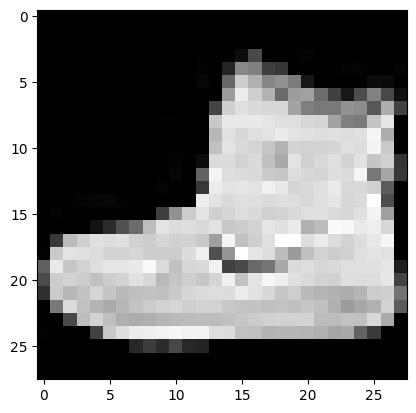

In [36]:
plt.imshow(image.squeeze(), cmap = 'gray')

In [37]:
# Creatre dummy image tensor
rand_image_tensor = torch.randn(1,28,28)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [38]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

Documentation : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [39]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image : \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image : 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [40]:
# Create a single Conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

### 7.2 Stepping through `nn.MaxPool2d()`

In [41]:
test_image.shape

torch.Size([3, 64, 64])

In [42]:
# Print out the original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer() : {test_image_through_conv.shape}")

# Pass data through the max_pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and maxpool_layer : {test_image_through_conv_and_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer() : torch.Size([1, 10, 62, 62])
Shape after going through conv_layer and maxpool_layer : torch.Size([1, 10, 31, 31])


In [43]:
torch.manual_seed(42)
# Create a random tensor with similar number of dimnsions
random_tensor = torch.randn([1,1,2,2])
print(f"Random tensor:\n{random_tensor}")
print(f"\nRandom tesnsor shape : {random_tensor.shape}")


# Create maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random_tensor through max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor}")
print(f"\nMax pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tesnsor shape : torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]])

Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [44]:
# Setup loss function/eval metrics/optimizizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### 7.4 Training and testing `model_2` using our training and test fucntions

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as train_time_end_on_cpu
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model =model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------
Train Loss : 0.59733 Train Acc : 78.39%
Test loss : 0.38779 Test Accuracy: 86.26%

Train time on cuda: 13.378 seconds
Epoch : 1
--------
Train Loss : 0.35697 Train Acc : 87.08%
Test loss : 0.34696 Test Accuracy: 87.67%

Train time on cuda: 25.345 seconds
Epoch : 2
--------
Train Loss : 0.32033 Train Acc : 88.46%
Test loss : 0.32624 Test Accuracy: 88.29%

Train time on cuda: 37.289 seconds


In [46]:
# Get `model_2` results


model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32624363899230957,
 'model_acc': 88.28873801916933}

## 8. Compare model results and training time

In [47]:
import pandas as pd

compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])

compare_results

,model_name,model_los,model_acc,model_loss
0,FashionMNISTModelV0,0.476639,83.426518,NaN
1,FashionMNISTModelV1,NaN,75.019968,0.685001
2,FashionMNISTModelV2,NaN,88.288738,0.326244


In [48]:
# Add training time to results comparison

compare_results["training_time"] =[total_train_time_model_0,
                                   total_train_time_on_model_1,
                                   total_train_time_model_2]

compare_results

,model_name,model_los,model_acc,model_loss,training_time
0,FashionMNISTModelV0,0.476639,83.426518,NaN,29.698668
1,FashionMNISTModelV1,NaN,75.019968,0.685001,37.072344
2,FashionMNISTModelV2,NaN,88.288738,0.326244,37.288862


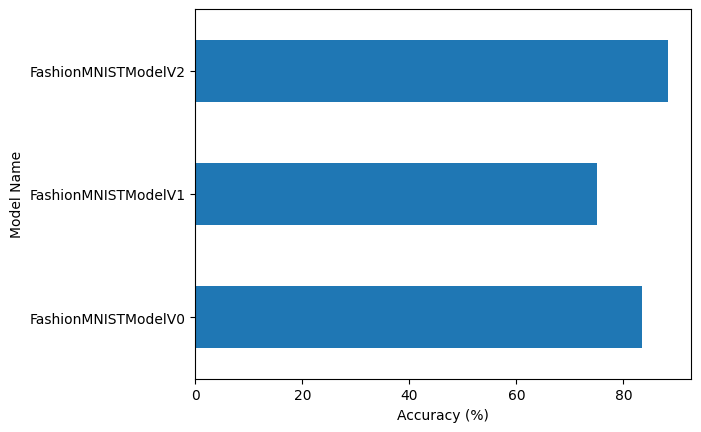

In [49]:
# Visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind = 'barh')
plt.xlabel('Accuracy (%)')
plt.ylabel("Model Name");

## 9. Make and evaluate random predictions with the best model.

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get the prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)

      # Get pred_probs of GPU
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [52]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k =9 ):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

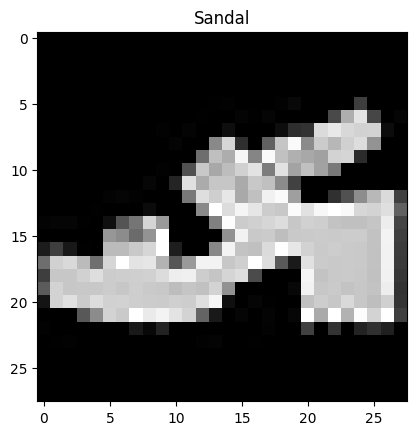

In [57]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [62]:
# Make predictions

pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.6067e-07, 1.2591e-07, 5.5435e-08, 6.7942e-08, 2.2097e-08, 9.9982e-01,
         1.0848e-07, 1.6619e-05, 3.3486e-05, 1.3398e-04],
        [2.7893e-02, 8.8730e-01, 2.4266e-03, 6.3987e-02, 3.6630e-03, 4.1781e-04,
         1.3243e-02, 4.5202e-04, 9.6710e-05, 5.1699e-04]])

In [63]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])